In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from lib.plots import load_data, climatology, single_column_initial_value, get_error_tables
import lib.plots.training
import lib.cam as lc
from xnoah.sam import coarsen

import seaborn as sns




width = 5.5
dpi = 100

sns.set_context("paper")
sns.set_style("white", {
    'figure.figsize' : (5.51, 5.51/1.61),
    'figure.dpi': 100,
    'image.cmap': 'viridis',
    'xtick.major.size': 3.5,
    'xtick.major.size': 3.5,
    'xtick.minor.size' : 1.75,
    'xtick.minor.visible' : True,
    'ytick.major.size': 3.5,
})


In [2]:
!mkdir -p ../../reports/paper

def savefig(path):
    plt.savefig(f"../../reports/paper/{path}")

I put the styling commands in the following few boxes

In [3]:
# plt.style.use(["default", "paper.style"])
width = 5.5
dpi = 100
# this magic needs to happen after I reset the rcParams
plt.rc("figure", dpi=150)

Here, I load the data and select the testing region.

In [4]:
ds= load_data(best_nn="../../data/output/model.VaryT-20/3/5/columns.nc")
ds_test = ds.isel(x=slice(0,64))

/Users/noah/anaconda/envs/uw-machine-learning/lib/python3.6/site-packages/metpy/calc/tools.py:692: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')


# Schematic diagram

In [5]:
cld = xr.open_dataarray("../../data/raw/2/NG_5120x2560x34_4km_10s_QOBS_EQX/hires/CLD.nc")

from PIL import Image

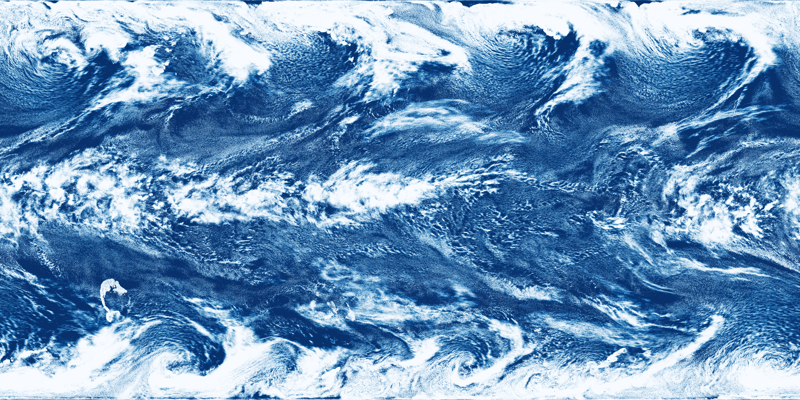

In [6]:
def image_from_xr(cld):

    cmap = plt.get_cmap('Blues_r')
    vals = np.uint8((cmap(cld.values[0]/100) * 255))
    im = Image.fromarray(vals[::-1])
    return im


im = image_from_xr(cld)
im_full = im.resize((800, 400), resample=Image.BICUBIC)
im_full

Define a small box to show the coarse graining grid on.

In [7]:
x, y = (4000, 1100)
n = 40 * 10

box = cld.isel(x=slice(x, x+ n), y=slice(y, y+n))

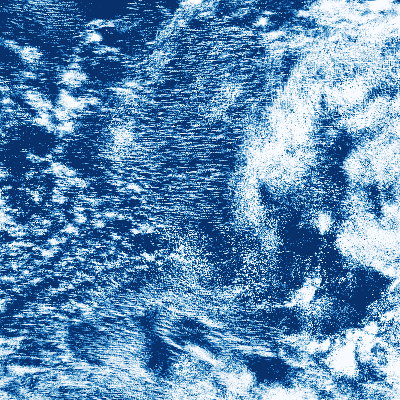

In [8]:
imhi = image_from_xr(box).resize((400, 400), Image.BICUBIC)
imhi

In [9]:
def get_im_xy(x, y):
    return (x-2560)/2560, (y-1280)/1280

In [10]:
print(f"""
\coordinate(NE) at {get_im_xy(x+n, y+n)};
\coordinate(SE) at {get_im_xy(x+n, y)};

\draw[ultra thick, red]{get_im_xy(x, y)} rectangle (NE);


""")


\coordinate(NE) at (0.71875, 0.171875);
\coordinate(SE) at (0.71875, -0.140625);

\draw[ultra thick, red](0.5625, -0.140625) rectangle (NE);





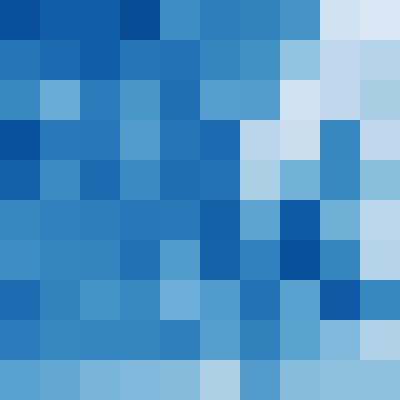

In [11]:
from xnoah.sam import coarsen

box_coarse = coarsen(box, dict(x=40, y=40)).compute()
imlo = image_from_xr(box_coarse).resize((400, 400), Image.NEAREST)
imlo

In [12]:
def save_im(name, im):
    im.save(f"../../reports/paper/{name}")

save_im("full.png", im_full)
save_im("lo.png", imlo)
save_im("hi.png", imhi)

# Table 1: Hyper Parameters

In [13]:
df = get_error_tables("../../data/output/test_error.nc")
df

$n$ $T$ Apparent Source $R^2$              64 Step Error             
                           $q_T$        $s_L$         $q_T$        $s_L$
0  128   2           0.63 (0.02)  0.74 (0.05)   1.23 (0.69)  2.24 (2.05)
1  128   5           0.62 (0.03)  0.74 (0.05)   0.58 (0.11)  1.05 (0.16)
2  128  10           0.59 (0.02)  0.73 (0.04)   0.37 (0.04)  0.63 (0.02)
3  128  20           0.55 (0.03)  0.72 (0.05)   0.27 (0.01)  0.54 (0.01)
4  128  40           0.27 (0.08)  0.46 (0.12)   0.30 (0.04)  0.57 (0.03)
5    5  10           0.55 (0.03)  0.70 (0.06)   0.79 (0.19)  1.35 (0.30)
6   64  10           0.60 (0.03)  0.73 (0.05)   0.45 (0.05)  0.79 (0.09)
7  128  10           0.59 (0.02)  0.73 (0.04)   0.37 (0.04)  0.63 (0.02)
8  256  10           0.59 (0.03)  0.73 (0.05)   0.33 (0.03)  0.62 (0.04)

Copy paste this into the latex file.

In [14]:
print(df.to_latex(index=False, escape=False))

\begin{tabular}{rrllll}
\toprule
 $n$ & $T$ & \multicolumn{2}{l}{Apparent Source $R^2$} & \multicolumn{2}{l}{64 Step Error} \\
     &                 $q_T$ &        $s_L$ &         $q_T$ &        $s_L$ \\
\midrule
 128 &   2 &           0.63 (0.02) &  0.74 (0.05) &   1.23 (0.69) &  2.24 (2.05) \\
 128 &   5 &           0.62 (0.03) &  0.74 (0.05) &   0.58 (0.11) &  1.05 (0.16) \\
 128 &  10 &           0.59 (0.02) &  0.73 (0.04) &   0.37 (0.04) &  0.63 (0.02) \\
 128 &  20 &           0.55 (0.03) &  0.72 (0.05) &   0.27 (0.01) &  0.54 (0.01) \\
 128 &  40 &           0.27 (0.08) &  0.46 (0.12) &   0.30 (0.04) &  0.57 (0.03) \\
   5 &  10 &           0.55 (0.03) &  0.70 (0.06) &   0.79 (0.19) &  1.35 (0.30) \\
  64 &  10 &           0.60 (0.03) &  0.73 (0.05) &   0.45 (0.05) &  0.79 (0.09) \\
 128 &  10 &           0.59 (0.02) &  0.73 (0.04) &   0.37 (0.04) &  0.63 (0.02) \\
 256 &  10 &           0.59 (0.03) &  0.73 (0.05) &   0.33 (0.03) &  0.62 (0.04) \\
\bottomrule
\end{tabular}



# Figure 6: Forced Single Column

In [15]:

def plot_t_vs_p(loc, axs, cax=None,
    models = ('Truth', 'Neural Network', 'CAM'),
    levels = np.arange(11)*2, text_kwargs=dict(),
             **kwargs,):
    

    for model, ax in zip(models, axs):
        val = loc.sel(model=model)
        im = ax.contourf(val.time, val.p, val.T, levels=levels, **kwargs)
        ax.contour(val.time, val.p, val.T, levels=levels, linewidths=.1, **kwargs)
    
        # add labels
        plt.text(.04, .8, model, transform=ax.transAxes, fontsize=10, **text_kwargs)

#     axs[0].invert_yaxis()


#     plt.colorbar(im, orientation='vertical', pad=.01, **cbar_kwargs, )
    
    return im

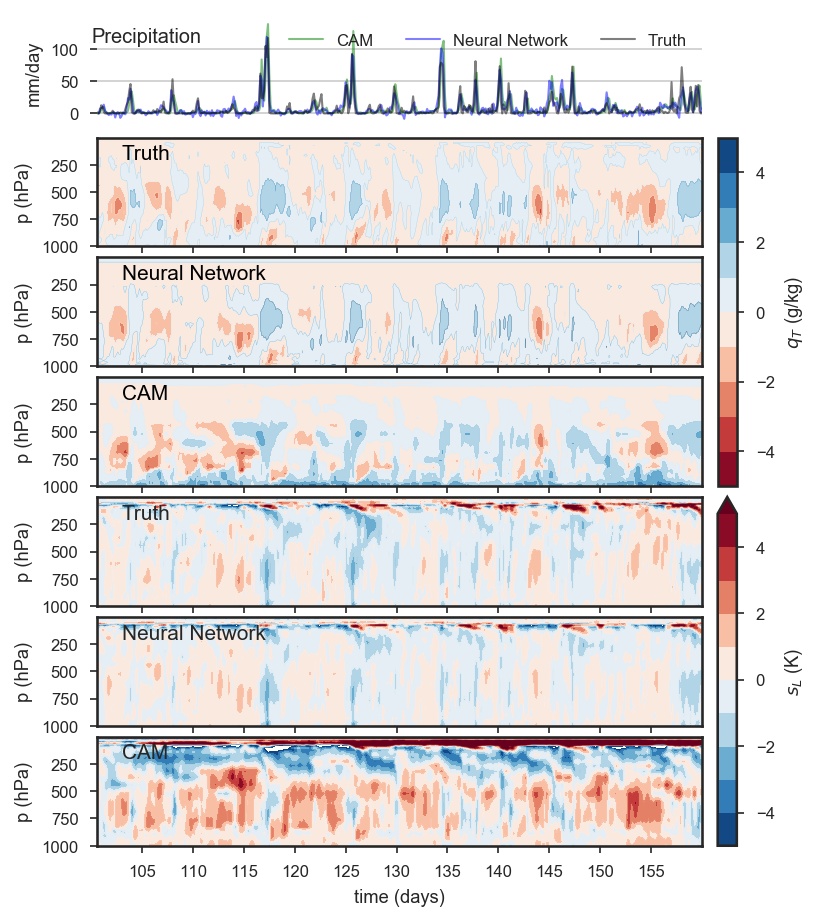

In [16]:
# loc = ds.isel(x=10, y=8)

from matplotlib import gridspec


def single_column_plot(loc, width=width):

    fig = plt.figure(figsize=(width, 6))
    gs = gridspec.GridSpec(7, 2, width_ratios=(.95, .03),
                          height_ratios=[1]*7,
                           wspace=.05,
                          hspace=.1,
                          bottom=.07, top=.99)

    # precip
    axp = fig.add_subplot(gs[0, 0])
    colors = {'Truth': 'k', 'CAM': 'g', 'Neural Network': 'b'}
    for model, value in loc.groupby('model'):
        axp.plot(value.time, value.prec.squeeze(), label=model,
                linewidth=1.0, c=colors[model], alpha=.5)

    for spine in set(axp.spines):
        axp.spines[spine].set_color('none')
    axp.xaxis.set_visible(False)
    axp.set_yticks([0, 50, 100])
    axp.set_ylabel("mm/day")
    axp.grid(axis='y')
    axp.text(100, 110, 'Precipitation')
    axp.set_xlim([ds.time.min(), ds.time.max()])
    axp.legend(ncol=3)

    # humidity
    axsq = [fig.add_subplot(gs[i, 0], sharex=axp) for i in range(1,4)]
    imq = plot_t_vs_p(loc.qt, axsq, text_kwargs={'color': 'black'},
                      levels=np.arange(-5,6)*1,
                      cmap='RdBu')
    cb = fig.colorbar(imq, cax=fig.add_subplot(gs[1:4, 1]))
    cb.set_label(r"$q_T$ (g/kg)")

    # temperature
    axst = [fig.add_subplot(gs[i, 0], sharex=axp) for i in range(4,7)]
    imsl = plot_t_vs_p(loc.sl, axst, extend='max',
               levels=np.arange(-5,6)*1,
               cmap='RdBu_r')
    cb = fig.colorbar(imsl, cax=fig.add_subplot(gs[4:, 1]))
    cb.set_label(r"$s_L$ (K)")


    # fix axes
    for ax in axsq + axst:
        ax.set_ylabel('p (hPa)')
        ax.set_yticks([1000, 750, 500, 250])
        ax.set_ylim([1000, 0])

    #     ax.set_xticklabels([1])

    axp.set_xlim([100.625, 160])
    axp.set_xticks(np.r_[105:160:5])

    axst[-1].set_xlabel("time (days)")

    
    
    
loc  = ds.isel(x=10, y=8)
anom = loc - loc.sel(model='Truth').mean('time')
anom = anom.assign(prec=loc.prec)
single_column_plot(anom)
savefig("fig4.png")

# Figure 7:  Equilibrium

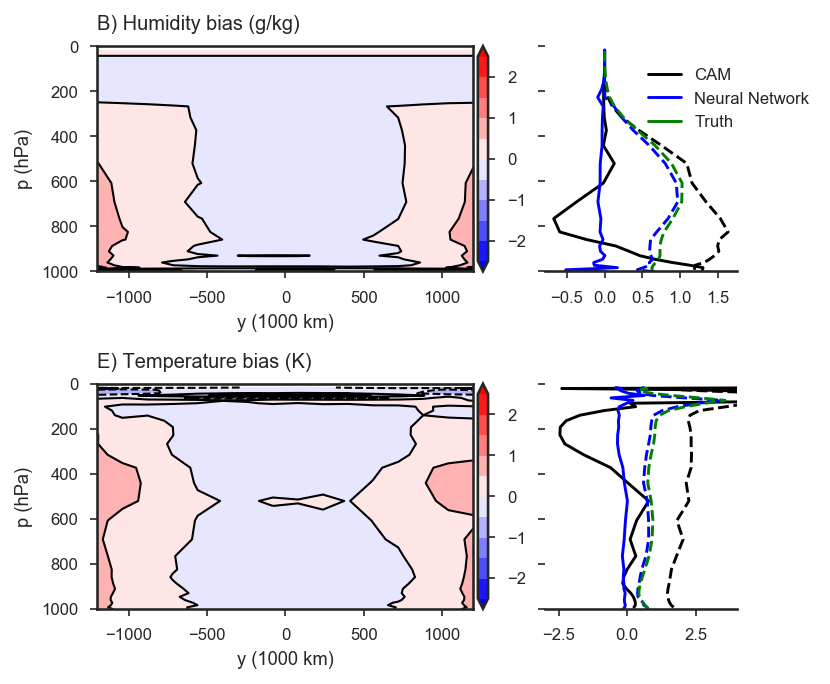

In [17]:
with plt.rc_context({'axes.titlepad': 8.0}):
    climatology.plot(ds_test, width=width)
    savefig("fig5.pdf")

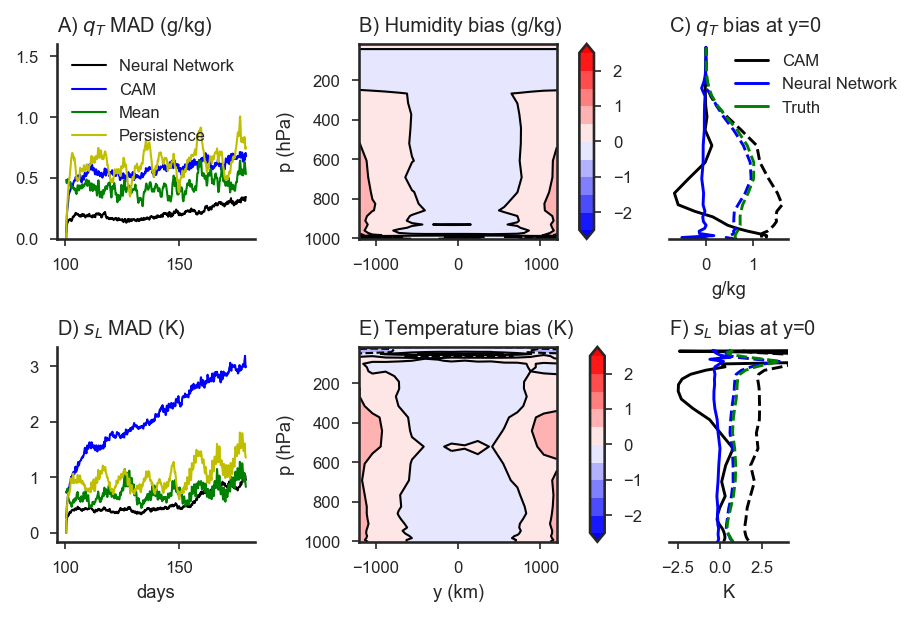

In [18]:
import lib.plots.climatology as lc
from matplotlib.gridspec import GridSpec
import lib.plots.transient_error as te


gridspec_kw = dict(
    width_ratios=(1, 1, .6),
    hspace=.50,
    wspace=.00,
    right=0.9,
    top=0.95,
)

fig, axs = plt.subplots(2, 3, figsize=(6.0, 4.0),
                        constrained_layout=True,
                        gridspec_kw=gridspec_kw)

# plot profiles
lc.plot_profiles(ds_test.isel(y=8), axs=axs[:, 2])


# plot biases
lc.plot_bias_pres_vs_lat(ds_test, axs=axs[:, 1])

# plot transient errors
loc = ds_test.isel(y=8)
lines = te.plot_column_error("qt", loc, ax=axs[0,0]);
te.plot_column_error("sl", loc, ax=axs[1,0]);


# hide_xlabels(axs[0, 0])

axs[1, 2].set_xlim([-3, 4])

for ax in axs[:,1]:
    ax.set_ylabel('p (hPa)')

# remove spines form error plots
for ax in axs[:,0]:
    for spine in ['top' , 'right']:
        ax.spines[spine].set_color('none')
        
axs[0,0].set_ylim([0, 1.6])


# make the titles
axs[0,0].set_title(r"A) $q_T$ MAD (g/kg) ", loc="left")
axs[1,0].set_title(r"D) $s_L$ MAD (K)", loc="left")
axs[0,2].set_title(r'C) $q_T$ bias at y=0', loc="left")
axs[1,2].set_title(r'F) $s_L$ bias at y=0', loc="left")


# x labels
axs[1,0].set_xlabel('days')
axs[0,2].set_xlabel('g/kg')
axs[1,2].set_xlabel('K')
axs[1,1].set_xlabel('y (km)')

# remove tick lables
for ax in axs[:,-1].flat:
    ax.set_yticks([])
    
for ax in axs[:,-2]:
    ax.invert_yaxis()

for ax in axs[0,:2].flat:
    ax.set_xlabel('')
    
# add legend to transient error plots
axs[0,0].legend()

savefig("clim.pdf")